In [ ]:
#Final Projesi
#Veri seti kaynak : https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset


In [90]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from currency_converter import CurrencyConverter
import datetime
from wordcloud import WordCloud, STOPWORDS 
import textwrap
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
data_imdb_movies = pd.read_csv('IMDB_movies.csv',error_bad_lines=False)

C:\Users\rabia.ozer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [91]:
data_imdb_movies = data_imdb_movies.copy()
data_imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [92]:
#verinin geri kalanı yükleniyor.
data_imdb_title_principals = pd.read_csv('IMDb_title_principals.csv')
imdb_title_principals = data_imdb_title_principals.copy()

data_imdb_names = pd.read_csv('IMDb_names.csv')
imdb_names = data_imdb_names.copy()

data_imdb_ratings = pd.read_csv('IMDb_ratings.csv')
imdb_ratings = data_imdb_ratings.copy()


In [93]:
#verinin içeriğine bakalım.
imdb_movies = data_imdb_movies.copy()
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [94]:
imdb_names = data_imdb_names.copy()
imdb_names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [95]:
imdb_title_principals = data_imdb_title_principals.copy()
imdb_title_principals.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [96]:
imdb_ratings = data_imdb_title_principals.copy()
imdb_ratings.head()


,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [97]:
#country alanı boş olan yerlere null yazdılacak.
imdb_movies['country'].fillna('', inplace = True)
#Veri setinin boyutunu azaltmak için USA filmleri alınacak.
imdb_movies = imdb_movies[imdb_movies['country'].str.contains('USA')]

In [98]:
#imdb_name_id kolonu ile name kolonuna merge işlemi yapılacak.
imdb_title_principals = pd.merge(imdb_ratings, imdb_names[['imdb_name_id', 'name']], 
                                 left_on = ['imdb_name_id'], right_on = ['imdb_name_id']) 

In [99]:
imdb_ratings.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [100]:
#budget_currency kolonu oluşturalım ve budgey kolonunu numerik değere dönüştürelim
imdb_movies['budget_currency'] = imdb_movies['budget'].str.split(' ', expand = True)[0]
imdb_movies['budget_currency'] = imdb_movies['budget_currency'].str.replace('$', 'USD')
imdb_movies['budget'] = imdb_movies['budget'].str.split(' ', expand = True)[1]
imdb_movies['budget'] = pd.to_numeric(imdb_movies['budget'], errors='coerce')

In [101]:
#worlwide_gross_income_currency sütunu oluşturun ve worlwide_gross_income sütununu usd'ye dönüştürmek için sayısal değerlere dönüştürülecek
imdb_movies['worlwide_gross_income_currency'] = imdb_movies['worlwide_gross_income'].str.split(' ', expand = True)[0]
imdb_movies['worlwide_gross_income_currency'] = imdb_movies['worlwide_gross_income_currency'].str.replace('$', 'USD')
imdb_movies['worlwide_gross_income'] = imdb_movies['worlwide_gross_income'].str.split(' ', expand = True)[1]
imdb_movies['worlwide_gross_income'] = pd.to_numeric(imdb_movies['worlwide_gross_income'], errors='coerce')

In [102]:
# Create usa_gross_income_currency column and formatting usa_gross_income column into numeric values for converting to usd
imdb_movies['usa_gross_income_currency'] = imdb_movies['usa_gross_income'].str.split(' ', expand = True)[0]
imdb_movies['usa_gross_income_currency'] = imdb_movies['usa_gross_income_currency'].str.replace('$', 'USD')
imdb_movies['usa_gross_income'] = imdb_movies['usa_gross_income'].str.split(' ', expand = True)[1]
imdb_movies['usa_gross_income'] = pd.to_numeric(imdb_movies['usa_gross_income'], errors='coerce')

In [103]:
# Görüntü yönetmenleri iiçin yeni bir kolon olulturulacak.
cinematographer_name = imdb_title_principals[imdb_title_principals['category']=='cinematographer'].reset_index()
cinematographer_name.rename(columns={'name' : 'cinematographer'}, inplace = True)
imdb_movies = pd.merge(imdb_movies, cinematographer_name[['imdb_title_id', 'cinematographer']],
                       left_on = 'imdb_title_id', right_on = 'imdb_title_id', how = 'left')

duplicated_data = imdb_movies[imdb_movies['imdb_title_id'].duplicated(keep = False)]
multiple_names_cinematographer = duplicated_data.groupby('imdb_title_id')['cinematographer'].apply(', '.join).reset_index()
duplicated_data.drop(['cinematographer'], axis = 1, inplace = True)
duplicated_data.drop_duplicates(subset=['imdb_title_id'], inplace = True)
data_multiple_names = pd.merge(duplicated_data, multiple_names_cinematographer[['imdb_title_id', 'cinematographer']], 
                               left_on = 'imdb_title_id', right_on = 'imdb_title_id')
data_multiple_names[['imdb_title_id', 'cinematographer']].head()

,imdb_title_id,cinematographer
0,tt0004134,"Dal Clawson, George W. Hill"
1,tt0005149,"Robert Newhard, Joseph H. August"
2,tt0007340,"King D. Gray, Stephen S. Norton"
3,tt0007755,"John W. Brown, Ben F. Reynolds"
4,tt0008196,"Walter Stradling, Charles Rosher"


In [104]:
# Drop and replace duplicate data (because names of cinematographer) with data which have multiple names of cinematographer
imdb_movies.drop_duplicates(subset=['imdb_title_id'], keep = False, inplace = True)
imdb_movies = pd.concat((imdb_movies, data_multiple_names), sort = False).sort_values('imdb_title_id')

# Reorder column cinematographer
cols = imdb_movies.columns.tolist()
cols = cols[0:13] + cols[-1:] + cols [13:-1]
imdb_movies = imdb_movies[cols]
imdb_movies.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,budget_currency,worlwide_gross_income_currency,usa_gross_income_currency
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,154,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,446,45000.0,NaN,NaN,NaN,25.0,3.0,USD,NaN,NaN
2,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,484,NaN,NaN,NaN,NaN,13.0,5.0,NaN,NaN,NaN
3,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,225,30000.0,NaN,NaN,NaN,8.0,1.0,USD,NaN,NaN
4,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,...,187,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN


In [105]:
num_data = ['duration', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 
            'metascore', 'reviews_from_users', 'reviews_from_critics']
imdb_movies[num_data].describe()

,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,34325.000000,34325.000000,3.432500e+04,1.362600e+04,1.058700e+04,1.134100e+04,9508.000000,33931.000000,32250.000000
mean,94.605273,5.609413,1.999168e+04,1.653007e+07,2.745399e+07,5.235318e+07,53.079617,82.781203,41.832031
std,18.796947,1.273202,8.161522e+04,3.844268e+07,5.607266e+07,1.389867e+08,17.807689,252.584710,78.525503
min,42.000000,1.100000,9.900000e+01,0.000000e+00,3.000000e+01,1.600000e+01,1.000000,1.000000,1.000000
25%,85.000000,4.800000,2.520000e+02,6.750000e+05,2.813175e+05,2.228400e+05,40.000000,8.000000,4.000000
50%,92.000000,5.800000,7.380000e+02,3.400000e+06,6.014341e+06,5.782515e+06,53.000000,19.000000,12.000000
75%,102.000000,6.500000,4.561000e+03,1.800000e+07,3.072612e+07,3.916444e+07,66.000000,54.000000,39.000000
max,398.000000,9.700000,2.278845e+06,2.500000e+09,9.366622e+08,2.797801e+09,100.000000,10472.000000,999.000000


In [106]:
#Convert currencies into USD
#pip install CurrencyConverter
from currency_converter import CurrencyConverter

C:\Users\rabia.ozer\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rabia.ozer\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rabia.ozer\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

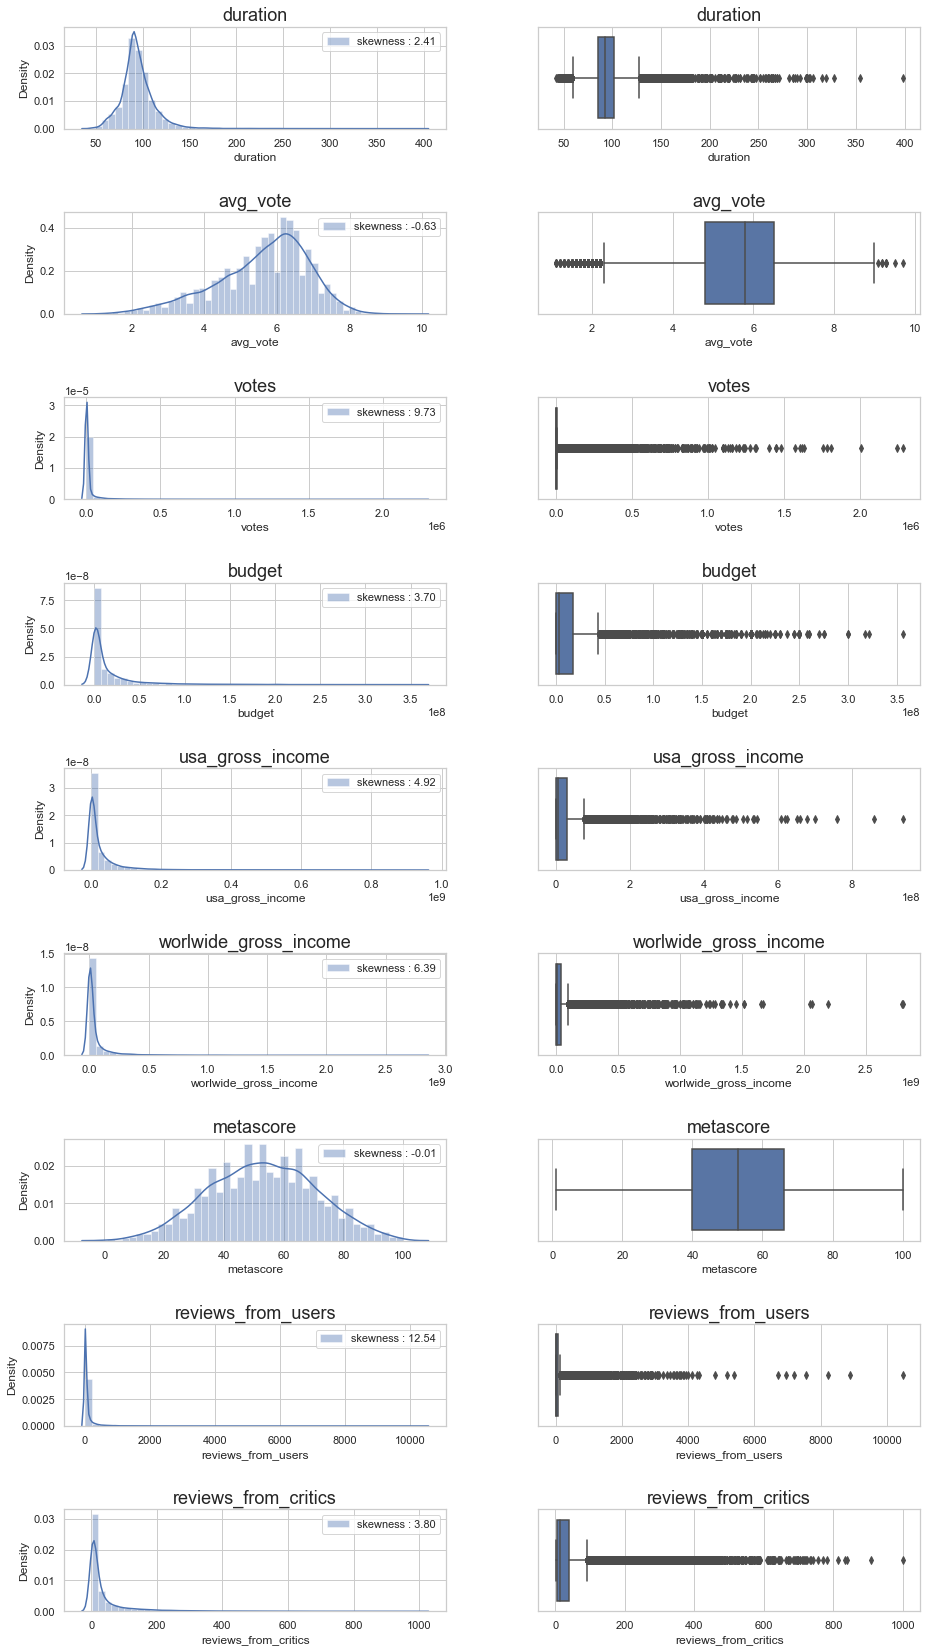

In [107]:
c = CurrencyConverter()
for i in range(imdb_movies.shape[0]):
    # budget column
    if (imdb_movies['budget_currency'].iloc[i] in c.currencies):
        imdb_movies['budget'].iloc[i] = c.convert(imdb_movies['budget'].iloc[i], imdb_movies['budget_currency'].iloc[i], 'USD')
    else :
        imdb_movies['budget'].iloc[i] = np.nan
   
    # worlwide_gross_income column   
    if (imdb_movies['worlwide_gross_income_currency'].iloc[i] in c.currencies):
        imdb_movies['worlwide_gross_income'].iloc[i] = c.convert(imdb_movies['worlwide_gross_income'].iloc[i], 
                                                            imdb_movies['worlwide_gross_income_currency'].iloc[i], 'USD', )
    else :
        imdb_movies['worlwide_gross_income'].iloc[i] = np.nan
    
    # usa_gross_income column   
    if (imdb_movies['usa_gross_income_currency'].iloc[i] in c.currencies):
        imdb_movies['usa_gross_income'].iloc[i] = c.convert(imdb_movies['usa_gross_income'].iloc[i], 
                                                       imdb_movies['usa_gross_income_currency'].iloc[i], 'USD', 
                                                       )
    else :
        imdb_movies['usa_gross_income'].iloc[i] = np.nan
        
        # Visualize distplot and boxplot on each numerical data/columns

fig, ax = plt.subplots(9, 2, figsize = (14, 24))
fig.tight_layout(pad = 5)

for i, n in enumerate(num_data):
    sns.distplot(ax = ax[i,0], a = imdb_movies[n].dropna(), label = 'skewness : %.2f'%(imdb_movies[n].skew()))
    ax[i,0].set_title(n, fontsize = 18)
    ax[i,0].legend(loc = 'best')
    
    sns.boxplot(ax = ax[i, 1], x = imdb_movies[n].dropna())
    ax[i, 1].set_title(n, fontsize = 18)
plt.show()

In [108]:
#Hangi On Yıl En Çok Film Yayınladı ve En Yüksek Ortalama Oy (Derecelendirme)
# Clean the data on 'year' column
imdb_movies['year'].replace('TV Movie 2019', 2019, inplace = True)
imdb_movies['year'] = imdb_movies['year'].astype(int)

# Group the data based on Decades
movies_by_decades = imdb_movies[['imdb_title_id', 'original_title', 'year','avg_vote', 'votes']]
decades = movies_by_decades['year']//10*10
decades = decades.astype(str)+' - '+ (decades+9).astype(str)
decades_column = pd.DataFrame(decades)
movies_by_decades.insert(3, 'decades', decades_column)
movies_by_decades.head()

,imdb_title_id,original_title,year,decades,avg_vote,votes
0,tt0000009,Miss Jerry,1894,1890 - 1899,5.9,154
1,tt0002101,Cleopatra,1912,1910 - 1919,5.2,446
2,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1910 - 1919,5.7,484
3,tt0002461,Richard III,1912,1910 - 1919,5.5,225
4,tt0003167,"Home, Sweet Home",1914,1910 - 1919,5.8,187


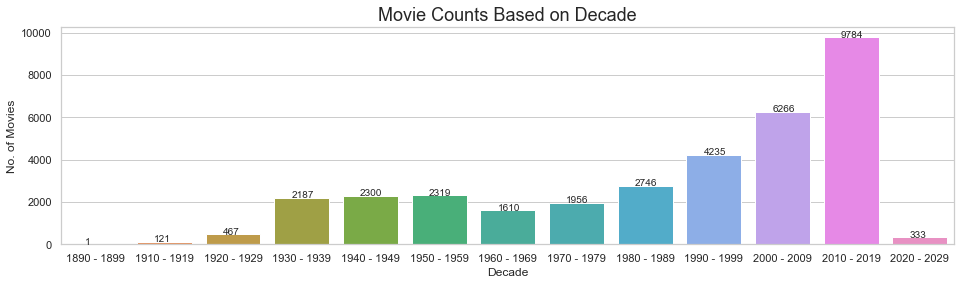

In [109]:
#Visualize movie counts release based on decade with barchart
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
decades = movies_by_decades.groupby('decades')['imdb_title_id'].count().index
count = movies_by_decades.groupby('decades')['imdb_title_id'].count()
sns.barplot(ax = ax, x = decades, y = count)
ax.set_title('Movie Counts Based on Decade', fontsize = 18)
ax.set_xlabel('Decade')
for index,count in enumerate(count.astype(int)):
       ax.text(x=index-0.15 , y =count+1 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
plt.show()

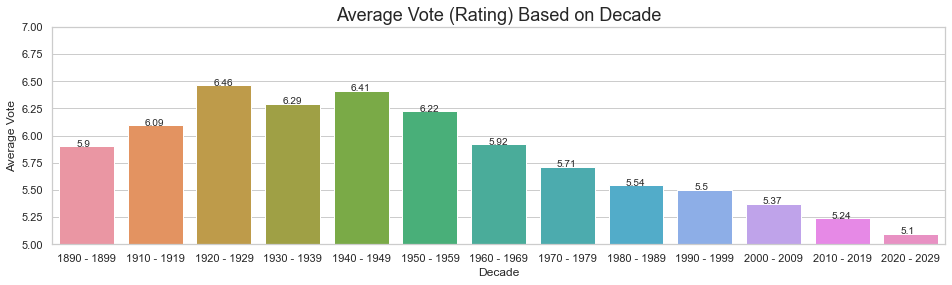

In [110]:
# Visualize average vote (rating) based on decade with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
decades = movies_by_decades.groupby('decades')['avg_vote'].mean().index
avg_vote = movies_by_decades.groupby('decades')['avg_vote'].mean()
sns.barplot(ax = ax, x = decades, y = avg_vote)
ax.set_title('Average Vote (Rating) Based on Decade', fontsize = 18)
ax.set_xlabel('Decade')
for index,avg_vote in enumerate(np.round(avg_vote, 2)):
       ax.text(x=index-0.15 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim((5, 7))
plt.show()

In [111]:
# Which Month Has Release Most Movies
# Preprocess the data 

imdb_movies['date_published'].replace('TV Movie 2019', 2019, inplace = True)
movies_published = imdb_movies[['imdb_title_id', 'original_title', 'genre', 'date_published']]
movies_published['month_published'] = [month[5:7] for month in movies_published['date_published'].astype(str)]

#print(movies_published['month_published'].unique()) # There are blank values on month_published column
movies_published['month_published'][movies_published['month_published']==''] = np.nan # replace blank values with nan
movies_published.head()

,imdb_title_id,original_title,genre,date_published,month_published
0,tt0000009,Miss Jerry,Romance,1894-10-09,10
1,tt0002101,Cleopatra,"Drama, History",1912-11-13,11
2,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","Biography, Drama",1913,NaN
3,tt0002461,Richard III,Drama,1912-10-15,10
4,tt0003167,"Home, Sweet Home",Drama,1914-05-17,05


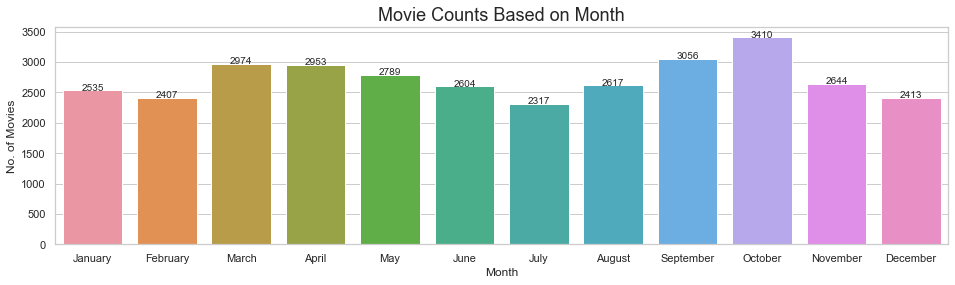

In [112]:
# Visualize movie counts release based on month with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
months_published = movies_published.groupby('month_published')['imdb_title_id'].count().index
count_movies = movies_published.groupby('month_published')['imdb_title_id'].count()
sns.barplot(ax = ax, x = months_published, y = count_movies)
ax.set_title('Movie Counts Based on Month', fontsize = 18)
ax.set_xlabel('Month')
ax.set_ylabel('No. of Movies')
for index,count_movies in enumerate(count_movies):
       ax.text(x=index-0.15 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June'
                    , 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

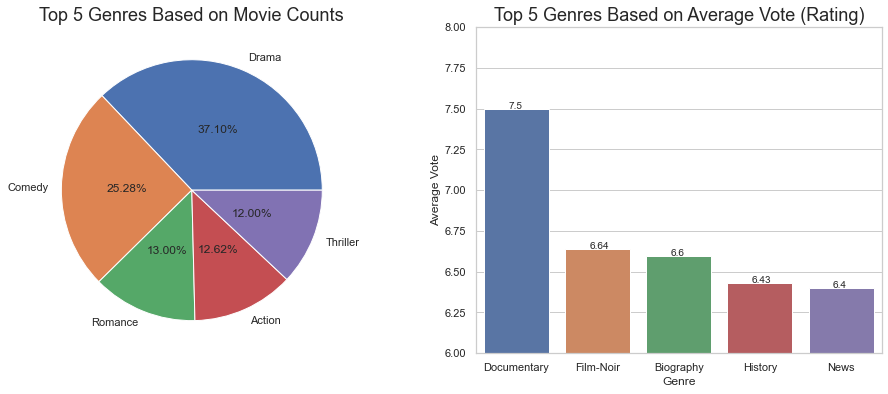

In [114]:
# En Çok Filmi Yayınlanan filmlerin türleri ve En Yüksek Ortalama Oyu alan filmler (Reyting)
# Preprocess and split genre column data (because there are more than one genre in each row data)

movies_genre = imdb_movies[['imdb_title_id', 'original_title', 'genre', 'avg_vote']]
movies_genre['genre'] = movies_genre['genre'].astype('str')

genre_split = pd.DataFrame(movies_genre['genre'].str.split(',').tolist(), index=movies_genre['imdb_title_id']).stack()
genre_split = genre_split.reset_index(['imdb_title_id'])
genre_split.columns = ['imdb_title_id', 'genre_split']
movies_genre_split = pd.merge(genre_split, movies_genre[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_genre_split['genre_split'] = movies_genre_split['genre_split'].str.lstrip(' ').str.rstrip(' ')
movies_genre_split.head()

# Visualize top 5 genres based on movie counts and based on average vote (rating)

fig, ax = plt.subplots(1, 2, figsize = (16,6))

genres = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False).index[0:5]
count_movies = movies_genre_split.groupby('genre_split')['imdb_title_id'].count().sort_values(ascending = False)[0:5]
ax[0].pie(x=count_movies, autopct="%.2f%%", labels=genres, pctdistance=0.5)
ax[0].set_title('Top 5 Genres Based on Movie Counts', fontsize = 18)

genres = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False).index[0:5]
avg_votes = movies_genre_split.groupby('genre_split')['avg_vote'].mean().sort_values(ascending = False)[0:5]
sns.barplot(ax = ax[1], x = genres, y = avg_votes)
ax[1].set_title('Top 5 Genres Based on Average Vote (Rating)', fontsize = 18)
ax[1].set_xlabel('Genre')
for index,avg_votes in enumerate(round(avg_votes, 2)):
    ax[1].text(x=index-0.1 , y =avg_votes+0 , s=f"{avg_votes}" , fontdict=dict(fontsize=10))
ax[1].set_ylabel('Average Vote')
ax[1].set_ylim(6, 8)

plt.show()


In [115]:
# En yüksek puanı alan director

# Preprocess and split director column data (because there are more than one director in each row data)

movies_director = imdb_movies[['imdb_title_id', 'original_title', 'director', 'avg_vote']]
movies_director['director'] = movies_director['director'].astype('str')

director_split = pd.DataFrame(movies_director['director'].str.split(',').tolist(), index=movies_director['imdb_title_id']).stack()
director_split = director_split.reset_index(['imdb_title_id'])
director_split.columns = ['imdb_title_id', 'director_split']
movies_director_split = pd.merge(director_split, movies_director[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_director_split['director_split'] = movies_director_split['director_split'].str.lstrip(' ').str.rstrip(' ')
gb_director = movies_director_split.groupby('director_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_director.drop(gb_director[gb_director.index == 'nan'].index, inplace = True)
gb_director.head()

,imdb_title_id,avg_vote
,count,mean
director_split,,
'Evil' Ted Smith,1,4.000
'Philthy' Phil Phillips,1,3.700
A. Blaine Miller,1,5.300
A. Dean Bell,2,4.650
A. Edward Sutherland,25,6.328


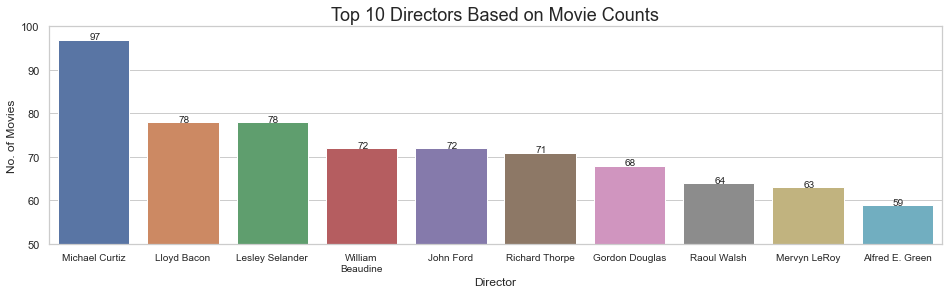

In [116]:
# Visualize top 10 directors based on movie counts with barchart
max_width = 15
fig, ax = plt.subplots(figsize = (16,4))
directors = gb_director[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_director[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]
sns.barplot(ax = ax, x = directors, y = count_movies)
ax.set_title('Top 10 Directors Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Director')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(50, 100)
plt.show()


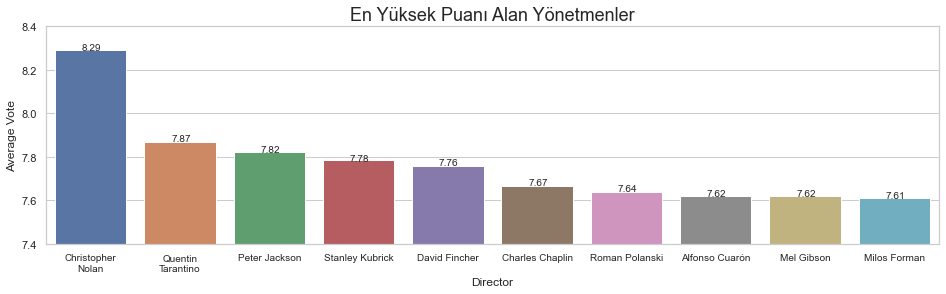

In [117]:
# Visualize top 10 directors based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have direct 5 movies
mask = movies_director_split.groupby('director_split')['imdb_title_id'].count() >= 5
directors = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_director.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = directors, y = avg_vote)
ax.set_title('En Yüksek Puanı Alan Yönetmenler', fontsize = 18)
ax.set_xlabel('Director')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7.4, 8.4)
plt.show()

In [118]:
# Which Writer Has Release Most Movies and Highest Average Vote (Rating)
# Preprocess and split writer column data (because there are more than one writer in each row data)

movies_writer = imdb_movies[['imdb_title_id', 'original_title', 'writer', 'avg_vote']]
movies_writer['writer'] = movies_writer['writer'].astype('str')

writer_split = pd.DataFrame(movies_writer['writer'].str.split(',').tolist(), index=movies_writer['imdb_title_id']).stack()
writer_split = writer_split.reset_index(['imdb_title_id'])
writer_split.columns = ['imdb_title_id', 'writer_split']
movies_writer_split = pd.merge(writer_split, movies_writer[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_writer_split['writer_split'] = movies_writer_split['writer_split'].str.lstrip(' ').str.rstrip(' ')
gb_writer = movies_writer_split.groupby('writer_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_writer.drop(gb_writer[gb_writer.index == 'nan'].index, inplace = True)
gb_writer.head()

,imdb_title_id,avg_vote
,count,mean
writer_split,,
'A.J.' Marriot,1,7.2
'Evil' Ted Smith,1,4.0
'Weird Al' Yankovic,1,7.0
50 Cent,2,4.6
A. Channing Edington,1,5.7


In [119]:
# Which Production Company Has Release Most Movies and Highest Average Vote (Rating)
# Preprocess production company column data

movies_productioncomp = imdb_movies[['imdb_title_id', 'original_title', 'production_company', 'avg_vote']]
movies_productioncomp['production_company'] = movies_productioncomp['production_company'].astype('str')

gb_productioncomp = movies_productioncomp.groupby('production_company').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_productioncomp.drop((gb_productioncomp[gb_productioncomp.index == ''].index) | (gb_productioncomp[gb_productioncomp.index == 'nan'].index), inplace = True)
gb_productioncomp.head()

,imdb_title_id,avg_vote
,count,mean
production_company,,
"""DIA"" Productions GmbH & Co. KG",1,6.1
"""Pempti & 12"" Tsaltabasis-Xenopoulos",1,6.0
#Sinning Works,2,4.0
'Am I Wrong?' Productions,1,4.5
.406 Production,1,6.9


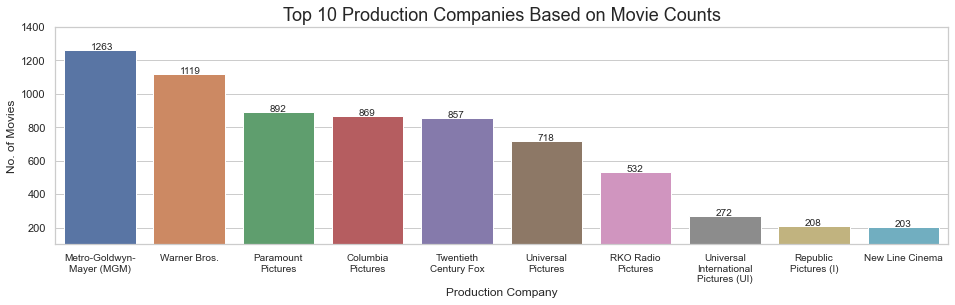

In [120]:
# Visualize top 10 production companies based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

productioncomp = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_productioncomp[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = count_movies)
ax.set_title('Top 10 Production Companies Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0.6 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(100, 1400)
plt.show()

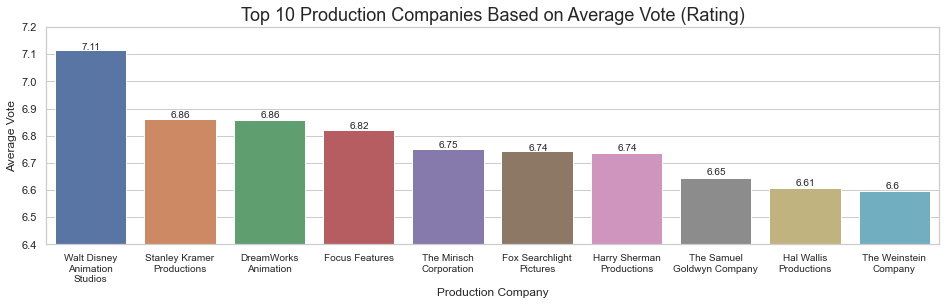

In [121]:
# Visualize top 10 production companies based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have produce 20 movies
mask = movies_productioncomp.groupby('production_company')['imdb_title_id'].count() >= 20
productioncomp = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_productioncomp.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = productioncomp, y = avg_vote)
ax.set_title('Top 10 Production Companies Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Production Company')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(6.4, 7.2)
plt.show()

In [122]:
# Which Actor Has Release Most Movies and Highest Average Vote (Rating)

# Preprocess and split actor column data (because there are more than one actor in each row data)

movies_actor = imdb_movies[['imdb_title_id', 'original_title', 'actors', 'avg_vote']]
movies_actor['actors'] = movies_actor['actors'].astype('str')

actor_split = pd.DataFrame(movies_actor['actors'].str.split(',').tolist(), index=movies_actor['imdb_title_id']).stack()
actor_split = actor_split.reset_index(['imdb_title_id'])
actor_split.columns = ['imdb_title_id', 'actor_split']
movies_actor_split = pd.merge(actor_split, movies_actor[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_actor_split['actor_split'] = movies_actor_split['actor_split'].str.lstrip(' ').str.rstrip(' ')
gb_actor = movies_actor_split.groupby('actor_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_actor.drop((gb_actor[gb_actor.index == 'nan'].index), inplace = True)
gb_actor.head()

,imdb_title_id,avg_vote
,count,mean
actor_split,,
'Baby' Carmen De Rue,3,5.166667
'Big Al' Solomon,1,3.400000
'Big Jack' Provan,1,6.000000
'Big Walter' Price,1,5.800000
'Big' Jack Little,1,4.300000


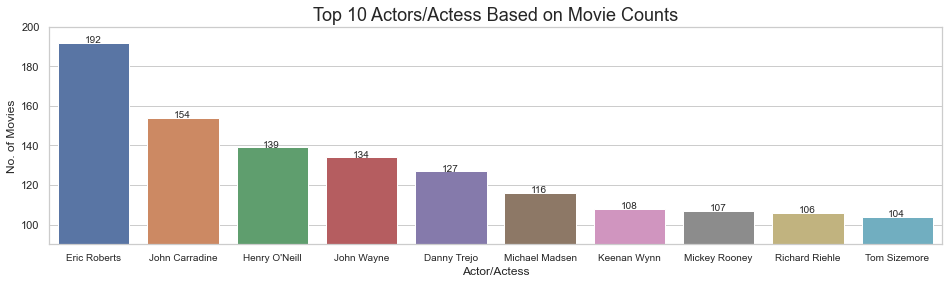

In [123]:
# Visualize top 10 actors based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

actor = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_actor[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = count_movies)
ax.set_title('Top 10 Actors/Actess Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Actor/Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.1 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(90, 200)
plt.show()

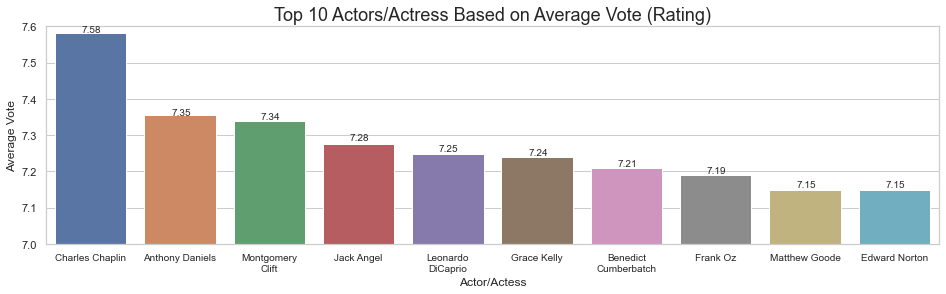

In [124]:
# Visualize top 10 actors based on average vote (rating) with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

# Specification : at least have become an actor/actress on 10 movies
mask = movies_actor_split.groupby('actor_split')['imdb_title_id'].count() >= 10
actor = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10].index
avg_vote = gb_actor.loc[mask][('avg_vote',  'mean')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = actor, y = avg_vote)
ax.set_title('Top 10 Actors/Actress Based on Average Vote (Rating)', fontsize = 18)
ax.set_xlabel('Actor/Actess')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,avg_vote in enumerate(round(avg_vote, 2)):
    ax.text(x=index-0.1 , y =avg_vote+0.005 , s=f"{avg_vote}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Average Vote')
ax.set_ylim(7, 7.6)
plt.show()


In [125]:
#Which Cinematographer Has Release Most Movies and Highest Average Vote (Rating)
# Preprocess and split cinematographer column data (because there are more than one cinematographer in each row data)

movies_cinematographer = imdb_movies[['imdb_title_id', 'original_title', 'cinematographer', 'avg_vote']]
movies_cinematographer['cinematographer'] = movies_cinematographer['cinematographer'].astype('str')

cinematographer_split = pd.DataFrame(movies_cinematographer['cinematographer'].str.split(',').tolist(), index=movies_cinematographer['imdb_title_id']).stack()
cinematographer_split = cinematographer_split.reset_index(['imdb_title_id'])
cinematographer_split.columns = ['imdb_title_id', 'cinematographer_split']

movies_cinematographer_split = pd.merge(cinematographer_split, movies_cinematographer[['imdb_title_id', 'original_title', 'avg_vote']],
                              left_on = 'imdb_title_id', right_on = 'imdb_title_id')
movies_cinematographer_split['cinematographer_split'] = movies_cinematographer_split['cinematographer_split'].str.lstrip(' ').str.rstrip(' ')
gb_cinematographer = movies_cinematographer_split.groupby('cinematographer_split').agg({ 'imdb_title_id' : ['count'], 'avg_vote': ['mean']})
gb_cinematographer.drop((gb_cinematographer[gb_cinematographer.index == 'nan'].index), inplace = True)
gb_cinematographer.head()

,imdb_title_id,avg_vote
,count,mean
cinematographer_split,,
A. Todd Smith,1,5.80
A. Troy Thomas,1,6.70
A.J. Fitzpatrick,1,3.40
A.J. Raitano,5,5.14
A.K. Rosencrans,1,4.10


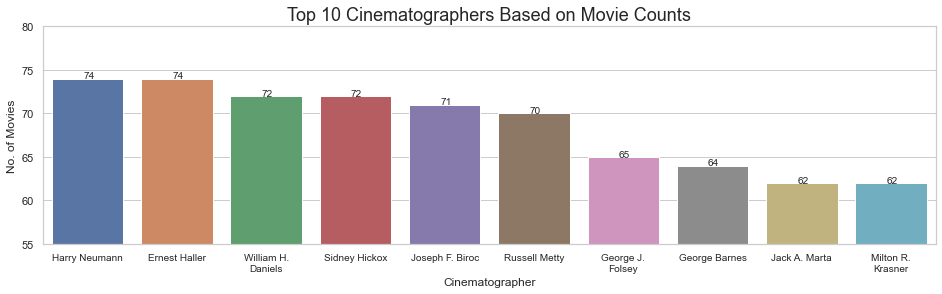

In [126]:
# Visualize top 10 cinematographers based on movie counts with barchart

max_width = 15
fig, ax = plt.subplots(figsize = (16,4))

cinematographer = gb_cinematographer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10].index
count_movies = gb_cinematographer[('imdb_title_id', 'count')].sort_values(ascending = False)[0:10]

sns.barplot(ax = ax, x = cinematographer, y = count_movies)
ax.set_title('Top 10 Cinematographers Based on Movie Counts', fontsize = 18)
ax.set_xlabel('Cinematographer')
ax.set_xticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels()), fontsize = 10)
for index,count_movies in enumerate(count_movies):
    ax.text(x=index-0.05 , y =count_movies+0 , s=f"{count_movies}" , fontdict=dict(fontsize=10))
ax.set_ylabel('No. of Movies')
ax.set_ylim(55, 80)
plt.show()

In [128]:
#Öneri sisteminde kullanılan veri seti : Film adı, film türü, yönetmeni, aktörleri, filmin tanımı.
#Python’da doğal dil işleme kütüphanesi (from nltk.corpus import stopwords) kulanılarak film tanımı kolonunda  var olan ekleri kaldırıp köklerini bulma işlemleri yapıldı.

#sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True) metodu kullanıldı. 
#Amaç :Kelimlerin ne kadar benzer olduğunu hesaplayabilmek için.
#Bu metod oluşturulduktan sonra yazılan film ismine benzer, konusuna benzer film önerisi yapmaktadır.


In [170]:
data_movie=imdb_movies[['original_title', 'genre', 'director', 'actors', 'description']].reset_index(drop = True)
data_movie.head()

,original_title,genre,director,actors,description
0,Miss Jerry,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.
1,Cleopatra,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...
2,"From the Manger to the Cross; or, Jesus of Naz...","Biography, Drama",Sidney Olcott,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ..."
3,Richard III,Drama,"André Calmettes, James Keane","Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...
4,"Home, Sweet Home",Drama,D.W. Griffith,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...


In [167]:
# Preprocess the data

data_recsys.set_index('original_title', inplace = True)

data_recsys['genre'] = data_recsys['genre'].fillna('').astype('str').str.lower()
data_recsys['genre'] = data_recsys['genre'].str.split(',')

data_recsys['director'] = data_recsys['director'].fillna('').astype('str').str.lower()
data_recsys['director'] = data_recsys['director'].str.split(',')

data_recsys['actors'] = data_recsys['actors'].fillna('').astype('str').str.lower()
data_recsys['actors'] = data_recsys['actors'].str.split(',')

In [168]:
data_recsys['description'] = data_recsys['description'].fillna('').astype('str').str.lower()
data_recsys['description'] = data_recsys['description'].str.translate(str.maketrans('', '', string.punctuation))

#from nltk.corpus import stopwords
listStopwords = set(stopwords.words('english'))
filtered = []
ps = PorterStemmer() 
for i, text in enumerate(data_recsys['description'].str.split()):
    for word in text:
        # Filtering/Removing stopwords in the text
        if word not in listStopwords:
            # Stemming words
            word_stemmed = ps.stem(word)
            filtered.append(word_stemmed)
    data_recsys['description'][i] = filtered
    filtered = []

In [172]:
# Create new column 'bunch_of_words' that contains words taken from all features columns

data_recsys['bunch_of_words'] = ''
for i, text in data_recsys.iterrows():
    words = ''
    for col in data_recsys.columns:
        words = words + ' '.join(text[col]) + ' '
    data_recsys['bunch_of_words'][i] = words

In [173]:
from nltk.corpus import stopwords
import sklearn 
from sklearn.metrics.pairwise import cosine_similarity

In [180]:
count = CountVectorizer()
count_matrix = count.fit_transform(data_recsys['bunch_of_words']).astype(np.uint8)

In [181]:
#Kosinüs Benzerliğini Hesaplamak için :

chunk_size = 500 
matrix_len = count_matrix.shape[0] # Not sparse numpy.ndarray
def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=count_matrix[start:end], Y=count_matrix)
cosine_similarity_all = []
i=0
for chunk_start in range(0, matrix_len, chunk_size):
    
   
    if i == 0: 
        cosine_sim = similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
   
    else :
        cosine_similarity_chunk= similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
     
        cosine_sim = np.concatenate((cosine_sim.astype(np.float32), cosine_similarity_chunk.astype(np.float32)))
    i= 1

In [185]:
# Yazılan filme benzer 10 film önermek için :
index_movies = pd.Series(data_recsys.index)

# Movies Recommendation function
def recommendation_movies(title, cosine_sim = cosine_sim):
    recommended_movies = []
    index_movie_input = index_movies[index_movies == title].index[0]
    score_movies = pd.Series(cosine_sim[index_movie_input]).sort_values(ascending = False)
    top_10_index_movies = list(score_movies.iloc[1:11].index)
    
    for i in top_10_index_movies:
        recommended_movies.append(imdb_movies['original_title'].iloc[i])
    return recommended_movies

In [186]:
#Film önerisi için
recommendation_movies('Harry Potter and the Chamber of Secrets')

['Harry Potter and the Goblet of Fire',
 'Harry Potter and the Deathly Hallows: Part 1',
 'Harry Potter and the Half-Blood Prince',
 "Harry Potter and the Sorcerer's Stone",
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Order of the Phoenix',
 'Snow Day',
 'Passage to Zarahemla',
 'Quantum Quest: A Cassini Space Odyssey',
 'Harry Potter and the Deathly Hallows: Part 2']